## Case Study Flatiron health insurance
### Importing all libraries 


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', 1000) # see all columns
pd.set_option('display.max_rows', 1000)

### Loading the data and exporing 

In [2]:
#Load our dataframe account for the index columns
#and make 
df = pd.read_csv('case_study.csv', index_col=0)

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [149]:
list_conditions = ['CHOLMED1', 'CVDCRHD4', 'CVDINFR4', 'CVDSTRK3',
                   'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR',
                   'CHCCOPD1','HAVARTH3', 'DIABETE3']
def make_chronic(dlist):
    for condition in dlist:
        if df[condition] == 1:
            return 1
df['CRONICALY_ILL'].apply()

In [148]:
df['CRONICALY_ILL'].value_counts()

1.0    19752
Name: CRONICALY_ILL, dtype: int64

In [88]:
new_df = df[['SEX','PHYSHLTH','_STATE','SMOKE100','SMOKDAY2','_SMOKER3','ALCDAY5','_AGE_G']]

In [89]:
new_df.head(5)

,SEX,PHYSHLTH,_STATE,SMOKE100,SMOKDAY2,_SMOKER3,ALCDAY5,_AGE_G
49938,2.0,0.0,9.0,2.0,NaN,4.0,101.0,2.0
49939,1.0,0.0,9.0,2.0,NaN,4.0,230.0,4.0
49940,2.0,2.0,9.0,2.0,NaN,4.0,0.0,1.0
49941,2.0,0.0,9.0,2.0,NaN,4.0,103.0,5.0
49942,2.0,0.0,9.0,1.0,3.0,3.0,101.0,5.0


## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [90]:
df['PHYSHLTH'].head()


49938    0.0
49939    0.0
49940    2.0
49941    0.0
49942    0.0
Name: PHYSHLTH, dtype: float64

In [91]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

Now check to see how large our subset df.

In [92]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [93]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [94]:
# create dic with value map
# use dic with .replace method

health_new = {88:0,
             77: np.nan,
             99: np.nan}

sex_new = {1: 'Male',
          2: 'Female'}

new_state = {9:'Conneticut',
             34:'New Jersey',
             36:'New York'}

df['PHYSHLTH'].replace(health_new, inplace = True)
new_df['PHYSHLTH'].replace(health_new, inplace = True)


df.dropna(subset=['PHYSHLTH'], inplace=True)
new_df.dropna(subset=['PHYSHLTH'], inplace=True)

new_df_sex = new_df[new_df['SEX']!=9]

new_df_sex['SEX'].replace(sex_new, inplace=True)
new_df_sex['_STATE'].replace(new_state, inplace=True)

new_df['PHYSHLTH'].describe()

new_df.pivot_table(index='_STATE', columns = 'PHYSHLTH')

df['PHYSHLTH'].value_counts(normalize=True)

df.dropna(subset=['PHYSHLTH'], inplace=True)

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [95]:
df.shape

(33747, 358)

In [96]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [97]:
#separate by sex 

dfemale = new_df_sex[new_df_sex['SEX'] == 'Female']

dmale = new_df_sex[new_df_sex['SEX'] == 'Male']

#take out zero sick days

no_sick_day = new_df_sex[new_df_sex['PHYSHLTH'] != 0]

dmale_no_sick = dmale[new_df_sex['PHYSHLTH'] != 0]

dfemale_no_sick = dfemale[new_df_sex['PHYSHLTH'] != 0]

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [98]:
no_sick_day['PHYSHLTH'].describe()


count    12444.000000
mean        11.071279
std         10.910660
min          1.000000
25%          2.000000
50%          5.000000
75%         20.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [99]:
new_df_sex[new_df_sex['SEX'] =='Male' ].count()


SEX         14818
PHYSHLTH    14818
_STATE      14818
SMOKE100    14184
SMOKDAY2     6417
_SMOKER3    14818
ALCDAY5     13773
_AGE_G      14818
dtype: int64

In [100]:
new_df_sex[new_df_sex['SEX'] =='Female' ].count()

SEX         18911
PHYSHLTH    18911
_STATE      18911
SMOKE100    18169
SMOKDAY2     7047
_SMOKER3    18911
ALCDAY5     17742
_AGE_G      18911
dtype: int64

In [101]:
18911-14818

4093

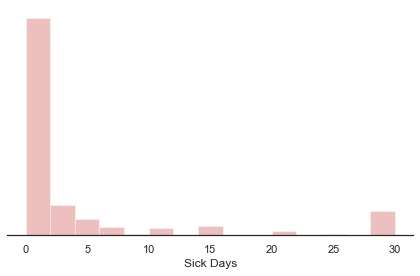

In [102]:
sns.set(style="white", palette="muted", color_codes=True)

d = new_df['PHYSHLTH']


# Set up the matplotlib figure
f, ax = plt.subplots()
ax = sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
ax = sns.distplot(d,kde=False, bins=15, color="r")
#sns.distplot(d, bins=20, kde=False, rug=True);
plt.xlabel('Sick Days')

plt.setp(ax, yticks=[])
plt.tight_layout()

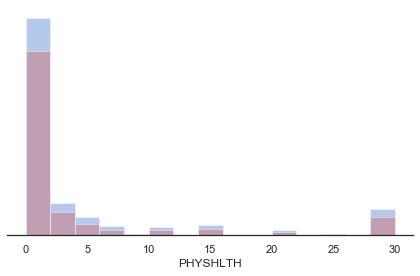

In [103]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots()
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(dfemale['PHYSHLTH'], kde=False, bins=15, color="b")

# Plot a kernel density estimate and rug plot
sns.distplot(dmale['PHYSHLTH'], kde=False, bins=15,  color="r")

plt.setp(axes, yticks=[])
plt.tight_layout()

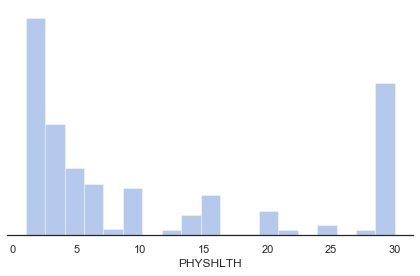

In [104]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots()
sns.despine(left=True)
sns.distplot(no_sick_day['PHYSHLTH'], kde=False, color="b")
plt.setp(axes, yticks=[])
plt.tight_layout()

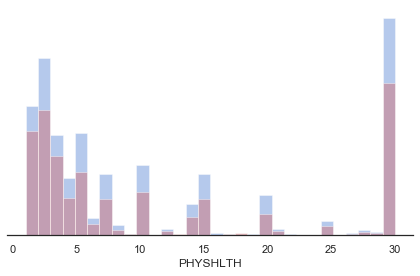

In [105]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots()
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(dfemale_no_sick['PHYSHLTH'], kde=False, bins=30, color="b")

# Plot a kernel density estimate and rug plot
sns.distplot(dmale_no_sick['PHYSHLTH'], kde=False, bins=30,  color="r")

plt.setp(axes, yticks=[])
plt.tight_layout()

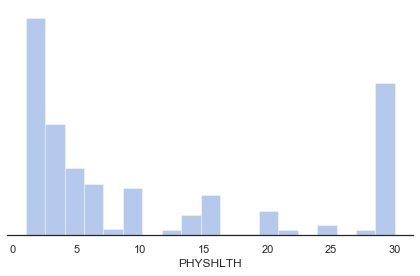

In [106]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots()
sns.despine(left=True)
sns.distplot(no_sick_day['PHYSHLTH'], kde=False, color="b")
plt.setp(axes, yticks=[])
plt.tight_layout()

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [116]:
# descriptive statistics
sick_days = df.groupby('_STATE')['PHYSHLTH'].mean()
states = ['Conneticut', 'New Jersey', 'New York']

d = {'States': states, "Mean_Sick_Day": sick_days}
Sickday_mean = pd.DataFrame(d)

SD_mean = Sickday_mean.reset_index()
SD_mean.drop('_STATE',axis=1,inplace=True)
SD_mean

,States,Mean_Sick_Day
0,Conneticut,3.688562
1,New Jersey,4.380957
2,New York,4.148030


In [117]:
# descriptive statistics
age_days = df.groupby('_AGE_G')['PHYSHLTH'].mean()
ages = ['18 TO 24', '25 TO 34', '35 TO 44','45 TO 54','55 TO 64', '>65']

d = {'ages': ages, "Mean_Sick_Day": age_days}
ageday_mean = pd.DataFrame(d)

SD_mean_age = ageday_mean.reset_index()
SD_mean_age.drop('_AGE_G',axis=1,inplace=True)
SD_mean_age

,ages,Mean_Sick_Day
0,18 TO 24,1.908431
1,25 TO 34,2.439264
2,35 TO 44,3.108158
3,45 TO 54,4.135131
4,55 TO 64,4.750454
5,>65,4.754786


## 3. Generate a graphic that compares the average number of sick days for each state. 

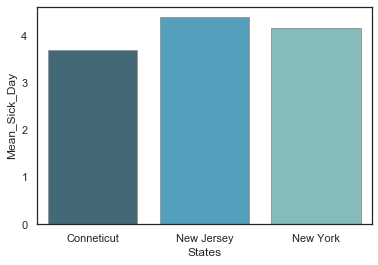

In [134]:
# code to graph those averages using matplotlib
ax1 = sns.barplot(x='States', y='Mean_Sick_Day', 
                  palette="GnBu_d", edgecolor=".6", data=SD_mean);

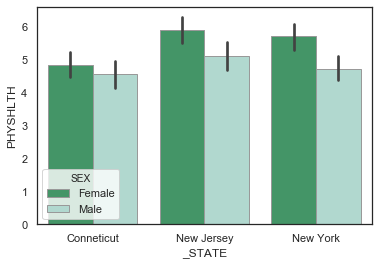

In [135]:
ax1 = sns.barplot(x='_STATE',y='PHYSHLTH', hue = 'SEX',
                  palette="BuGn_r", edgecolor=".6", data=new_df_sex);

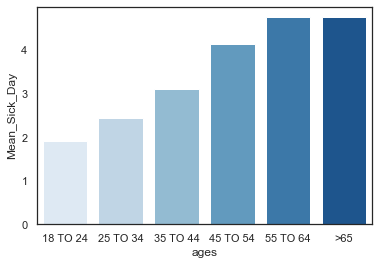

In [122]:
ax1 = sns.barplot(x='ages', y='Mean_Sick_Day', 
                  palette="Blues", data=SD_mean_age);


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [137]:
# code to create new colum for chronically sick


new_df_sex['CHRONIC'] = np.where(new_df_sex['PHYSHLTH'] >= 15, 1, 0)

new_df_sex

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,SEX,PHYSHLTH,_STATE,SMOKE100,SMOKDAY2,_SMOKER3,ALCDAY5,_AGE_G,CHRONIC
49942,Female,0.0,Conneticut,1.0,Not at all,3.0,101.0,5.0,0
49944,Female,0.0,Conneticut,1.0,Not at all,3.0,230.0,5.0,0
49946,Female,28.0,Conneticut,1.0,Not at all,3.0,0.0,6.0,1
49951,Male,0.0,Conneticut,1.0,Not at all,3.0,0.0,6.0,0
49954,Male,0.0,Conneticut,1.0,Not at all,3.0,202.0,5.0,0
...,...,...,...,...,...,...,...,...,...
303768,Male,0.0,New York,1.0,Not at all,3.0,201.0,2.0,0
303769,Male,10.0,New York,1.0,Not at all,3.0,102.0,5.0,0
303773,Female,2.0,New York,1.0,Not at all,3.0,208.0,2.0,0
303774,Male,0.0,New York,1.0,Every day,1.0,203.0,4.0,0


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

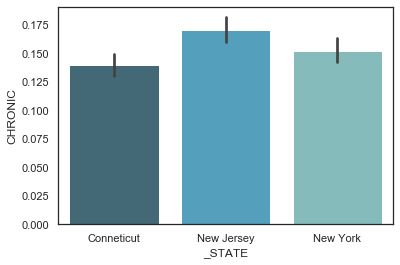

In [138]:
ax1 = sns.barplot(x='_STATE',y='CHRONIC',
                  palette="GnBu_d", data=new_df_sex);

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [33]:
df.shape

(33747, 358)

First we need to update SMOKDAY2 based on the No ansewers in SMOKE100.




In [34]:
new_df_sex.loc[new_df_sex['SMOKE100'] == 2, ['SMOKDAY2']] = 3

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
new_df_sex.drop(new_df_sex[(new_df_sex['SMOKDAY2'] == 7) |
                          (new_df_sex['SMOKDAY2'] == 9)].index ,
               inplace = True)


/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [125]:
new_df_sex.drop(new_df_sex[(new_df_sex['SMOKDAY2'] == np.nan)].index,
                inplace = True)

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [126]:
new_df_sex.dropna(subset=['SMOKDAY2'], inplace = True)


/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
new_df_sex['SMOKDAY2'].value_counts()


3.0    9491
1.0    2610
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [128]:
smoke_type = ['Every day', 'Some days', 'Not at all']

In [129]:
new_smoke = dict(zip([1,2,3], smoke_type))

In [130]:
new_smoke

{1: 'Every day', 2: 'Some days', 3: 'Not at all'}

In [131]:
new_df_sex['SMOKDAY2'].replace(new_smoke, inplace = True)

In [132]:
new_df_sex['SMOKDAY2'].value_counts()

Not at all    9491
Every day     2610
Some days     1336
9.0             21
7.0              6
Name: SMOKDAY2, dtype: int64

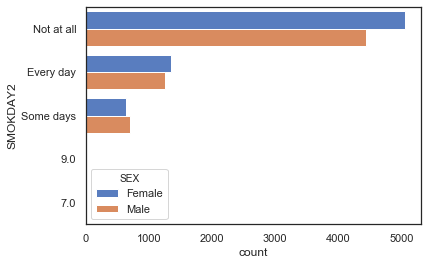

In [133]:
 ax = sns.countplot(y="SMOKDAY2", hue='SEX', data=new_df_sex)

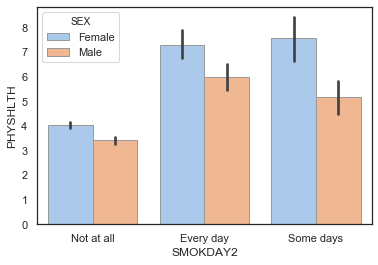

In [45]:
ax1 = sns.barplot(x='SMOKDAY2',y='PHYSHLTH', hue = 'SEX',
                  palette="pastel", edgecolor=".6", data=new_df_sex);

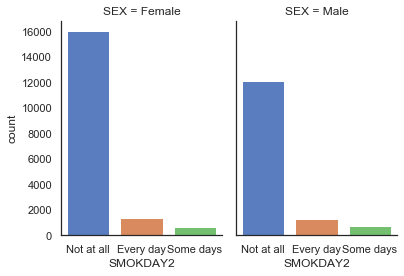

In [46]:
ax2 = sns.catplot(x="SMOKDAY2", col="SEX", 
                  data=new_df_sex, kind="count",
                  height=4, aspect=.7);

In [ ]:
ax2 = sns.catplot(x="SMOKDAY2", col="SEX", 
                  data=new_df_sex, kind="count",
                  height=4, aspect=.7);


## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [49]:
alc_new = {888:0,
             777: np.nan,
             999: np.nan}


new_df_sex['ALCDAY5'].replace(alc_new, inplace = True)

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [51]:
new_df_sex['ALCDAY5'].value_counts()

0.0      12542
201.0     2946
202.0     2284
101.0     1557
203.0     1313
102.0     1209
205.0     1141
230.0     1139
204.0     1125
210.0      829
103.0      769
107.0      690
220.0      636
215.0      584
206.0      382
104.0      378
208.0      359
105.0      345
207.0      276
225.0      263
212.0      142
106.0      109
228.0       55
214.0       51
229.0       31
209.0       26
227.0       24
218.0       18
226.0       15
216.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: ALCDAY5, dtype: int64

In [81]:
#cleaning data

def alcday(x):
    if x > 200:
        return x-200
    elif x > 100:
        return  (x-100)*4
    else:
        return x

In [82]:
new_df_sex['DRINKDAY'] = new_df_sex.apply(lambda row: alcday(row['ALCDAY5']),
                                                           axis=1)

/Users/andreschaves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
new_df_sex['DRINKDAY'].value_counts()

0.0     12542
1.0      2946
4.0      2682
2.0      2284
8.0      1568
3.0      1313
5.0      1141
30.0     1139
20.0      981
12.0      911
10.0      829
28.0      745
15.0      584
16.0      393
6.0       382
7.0       276
25.0      263
24.0      123
14.0       51
29.0       31
9.0        26
27.0       24
18.0       18
26.0       15
22.0       13
21.0       13
13.0       11
11.0       10
17.0        7
23.0        2
19.0        1
Name: DRINKDAY, dtype: int64

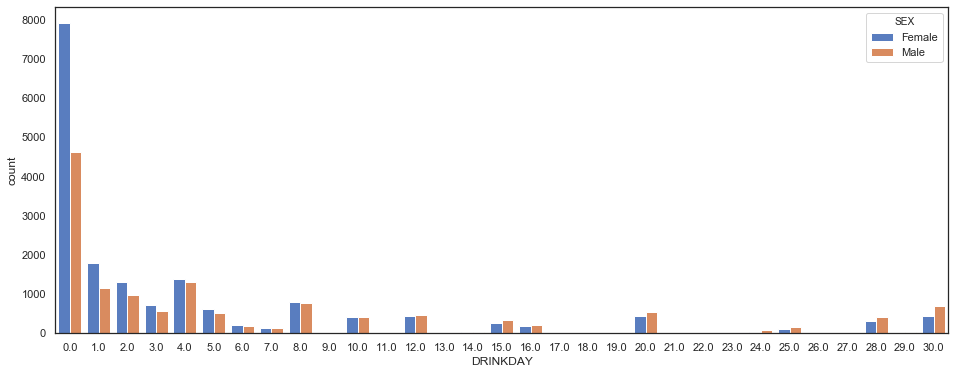

In [86]:
plt.figure(figsize=(16, 6))
ax3 = sns.countplot(x="DRINKDAY", hue='SEX', data=new_df_sex)


## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  